# Pandas 시각화 연구과제

다음의 데이터는 1999년과 2008년에 미국 EPA에서 조사하여 발표한 자동차 주요 모델별 연비 데이터의 일부이다.

| id | manufacturer | model | displ | year | cyl | trans      | drv | cty | hwy | fl | class   |
|----|--------------|-------|-------|------|-----|------------|-----|-----|-----|----|---------|
| 1  | audi         | a4    | 1.8   | 1999 | 4   | auto(l5)   | f   | 18  | 29  | p  | compact |
| 2  | audi         | a4    | 1.8   | 1999 | 4   | manual(m5) | f   | 21  | 29  | p  | compact |
| 3  | audi         | a4    | 2     | 2008 | 4   | manual(m6) | f   | 20  | 31  | p  | compact |
| 4  | audi         | a4    | 2     | 2008 | 4   | auto(av)   | f   | 21  | 30  | p  | compact |
| 5  | audi         | a4    | 2.8   | 1999 | 6   | auto(l5)   | f   | 16  | 26  | p  | compact |

전체 데이터는 아래의 URL을 통해 확인할 수 있다.

> https://data.hossam.kr/pydata/mpg.xlsx

데이터는 234 개의 행이 있으며, 각 행은 다음과 같은 변수로 구성되어 있다.

| 변수 | 설명 |
|--|--|
| manufacturer | 자동차 제조사 |
| model | 자동차 모델명 |
| displ | 자동차 배기량 |
| year | 제조년도 |
| cyl | 엔진 실린더 수 |
| trans | 자동차 트랜스미션 종류 |
| drv | 자동차 구동 방식. f=전륜구동, r=후륜구동, 4=사륜구동 |
| cty | 도심 연비 (마일/갤론) |
| hwy | 고속도로 연비 (마일/갤론) |
| fl | 연료 종류 |
| class | 자동차 분류 |

##  문제 1

자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화 하시오. 
category: trans, drv, fl, class, manufacturer, model

In [1]:
import sys
import numpy as np
from pandas import read_excel, pivot_table, crosstab
from matplotlib import pyplot as plt

In [2]:
origin = read_excel("https://data.hossam.kr/pydata/mpg.xlsx", index_col="id")
origin

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize


In [3]:
origin['model'] = origin['model'].astype('category')
origin['trans'] = origin['trans'].astype('category')
origin['class'] = origin['class'].astype('category')
origin['model'] = origin['model'].astype('category')
origin['manufacturer'] = origin['manufacturer'].astype('category')
origin['fl'] = origin['fl'].astype('category')
origin['drv'] = origin['drv'].astype('category')

origin.info()
# category: trans, drv, fl, class, manufacturer, model

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   manufacturer  234 non-null    category
 1   model         234 non-null    category
 2   displ         234 non-null    float64 
 3   year          234 non-null    int64   
 4   cyl           234 non-null    int64   
 5   trans         234 non-null    category
 6   drv           234 non-null    category
 7   cty           234 non-null    int64   
 8   hwy           234 non-null    int64   
 9   fl            234 non-null    category
 10  class         234 non-null    category
dtypes: category(6), float64(1), int64(4)
memory usage: 15.4 KB


In [4]:
plt.rcParams["font.family"]='Malgun Gothic'
plt.rcParams["font.size"] =12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

In [5]:
df = origin.groupby('manufacturer').count()
df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_113688\3219056848.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = origin.groupby('manufacturer').count()


,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
manufacturer,,,,,,,,,,
audi,18,18,18,18,18,18,18,18,18,18
chevrolet,19,19,19,19,19,19,19,19,19,19
dodge,37,37,37,37,37,37,37,37,37,37
ford,25,25,25,25,25,25,25,25,25,25
honda,9,9,9,9,9,9,9,9,9,9
hyundai,14,14,14,14,14,14,14,14,14,14
jeep,8,8,8,8,8,8,8,8,8,8
land rover,4,4,4,4,4,4,4,4,4,4
lincoln,3,3,3,3,3,3,3,3,3,3


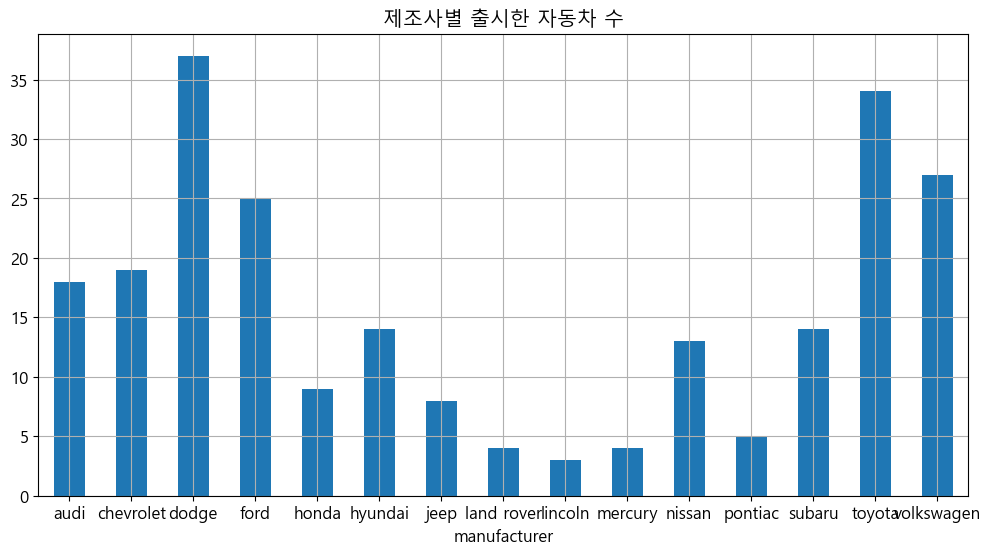

In [6]:
df['model'].plot.bar(rot=0)
plt.grid()
plt.title("제조사별 출시한 자동차 수")
plt.show()
plt.close()

##  문제 2

자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오.



In [7]:
manufacturer = df.index
manufacturer

CategoricalIndex(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai',
                  'jeep', 'land rover', 'lincoln', 'mercury', 'nissan',
                  'pontiac', 'subaru', 'toyota', 'volkswagen'],
                 categories=['audi', 'chevrolet', 'dodge', 'ford', ..., 'pontiac', 'subaru', 'toyota', 'volkswagen'], ordered=False, dtype='category', name='manufacturer')

In [8]:
df2=origin.filter(['year', 'manufacturer', 'model'])
df2
# df2.set_index('year')
df2.value_counts()

year  manufacturer  model                 
2008  dodge         ram 1500 pickup 4wd       7
1999  dodge         caravan 2wd               6
2008  jeep          grand cherokee 4wd        6
1999  volkswagen    jetta                     5
2008  hyundai       tiburon                   5
                                             ..
      nissan        maxima                    1
      toyota        land cruiser wagon 4wd    1
1999  chevrolet     c1500 suburban 2wd        1
      audi          a6 quattro                1
      toyota        land cruiser wagon 4wd    1
Name: count, Length: 76, dtype: int64

In [9]:
df2_crs =crosstab(index=df2['manufacturer'], columns=df2['year'])

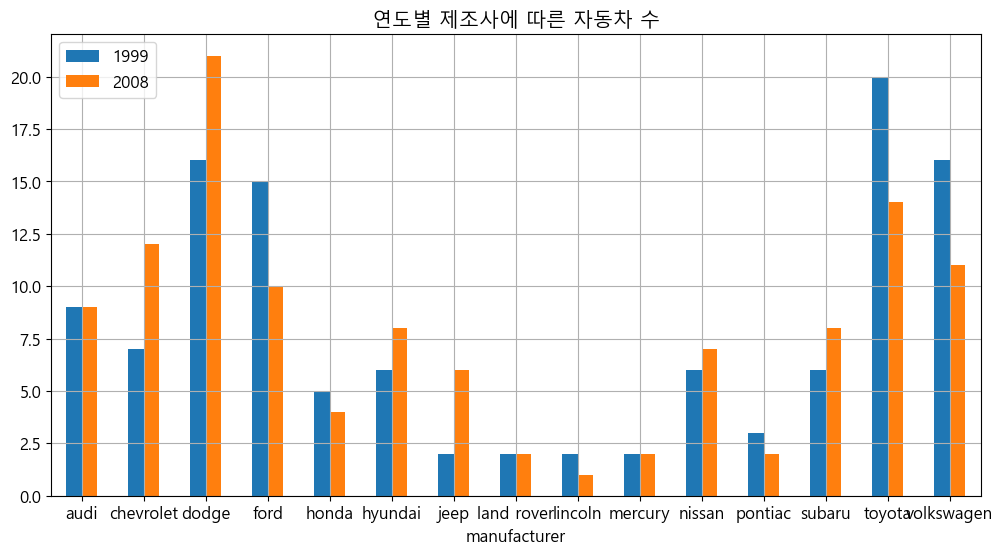

In [10]:
df2_crs.plot.bar(rot=0, color = ['#cd'])
plt.grid()
plt.legend()
plt.title("연도별 제조사에 따른 자동차 수")
plt.show()
plt.close()

##  문제 3

구동방식에 따른 자동차 수를 하나의 그래프로 시각화 하시오.



In [11]:
df3 = origin.filter(['model', 'drv'])
drv_num = df3.groupby('drv').count()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_113688\1022147569.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  drv_num = df3.groupby('drv').count()


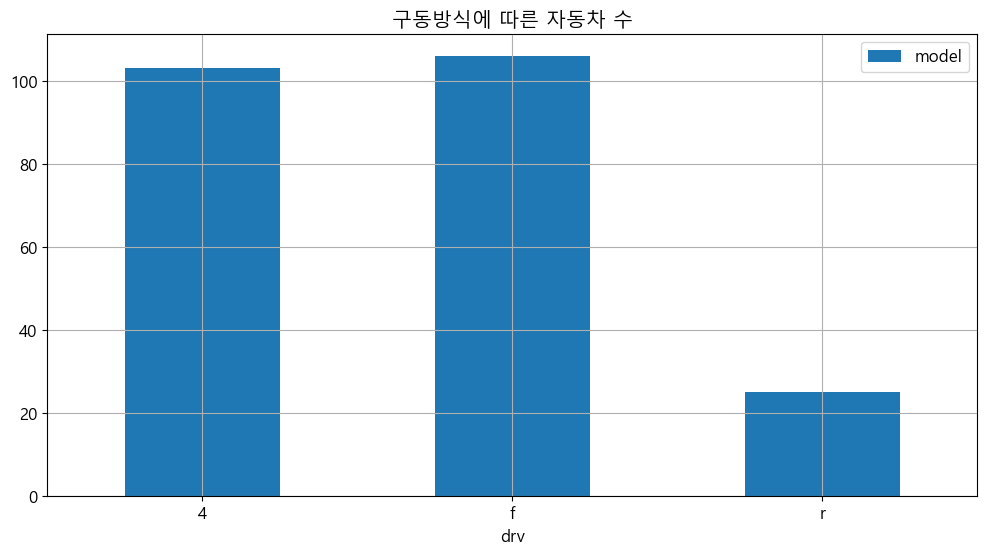

In [12]:
drv_num.plot.bar(rot=0)
plt.grid()
plt.legend()
plt.title("구동방식에 따른 자동차 수")
plt.show()
plt.close()

##  문제 4

자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화 하시오.



In [13]:
df4 = origin.filter(['cty', 'model', 'drv'])
df4

,cty,model,drv
id,,,
1,18,a4,f
2,21,a4,f
3,20,a4,f
4,21,a4,f
5,16,a4,f
...,...,...,...
230,19,passat,f
231,21,passat,f
232,16,passat,f


In [14]:
cty_mean = df4.groupby('drv').mean('cty')
cty_mean

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_113688\3963546650.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cty_mean = df4.groupby('drv').mean('cty')


,cty
drv,
4,14.330097
f,19.971698
r,14.080000


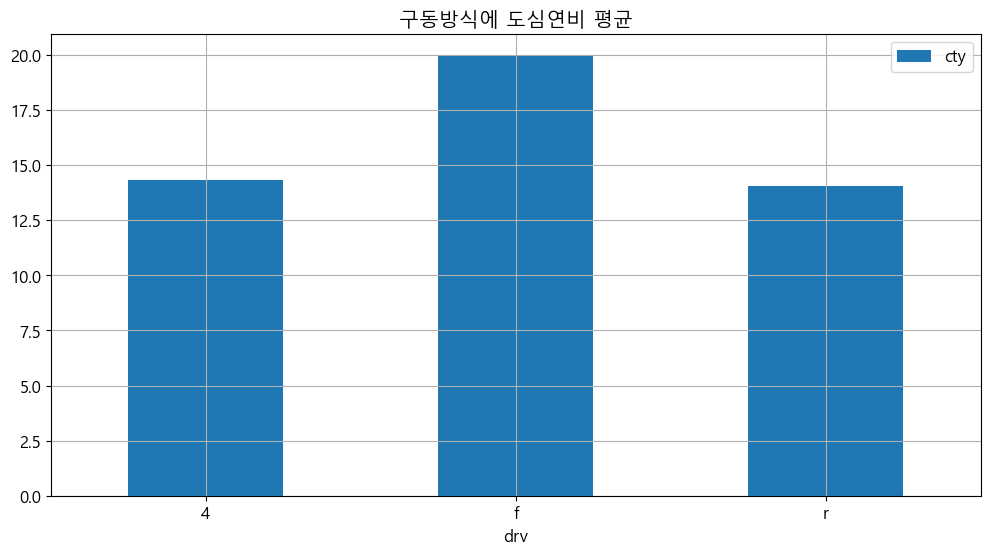

In [15]:
cty_mean.plot.bar(rot=0)
plt.grid()
plt.legend()
plt.title("구동방식에 도심연비 평균")
plt.show()
plt.close()

##  문제 5

자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화 하시오.



In [16]:
df5 = origin.filter(['model', 'manufacturer', 'cty', 'hwy' ])
df5

,model,manufacturer,cty,hwy
id,,,,
1,a4,audi,18,29
2,a4,audi,21,29
3,a4,audi,20,31
4,a4,audi,21,30
5,a4,audi,16,26
...,...,...,...,...
230,passat,volkswagen,19,28
231,passat,volkswagen,21,29
232,passat,volkswagen,16,26


In [17]:
bth_mean = df5.groupby('manufacturer').mean('cty','hwy')
bth_mean

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_113688\1514461337.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bth_mean = df5.groupby('manufacturer').mean('cty','hwy')


,cty,hwy
manufacturer,,
audi,17.611111,26.444444
chevrolet,15.000000,21.894737
dodge,13.135135,17.945946
ford,14.000000,19.360000
honda,24.444444,32.555556
hyundai,18.642857,26.857143
jeep,13.500000,17.625000
land rover,11.500000,16.500000
lincoln,11.333333,17.000000


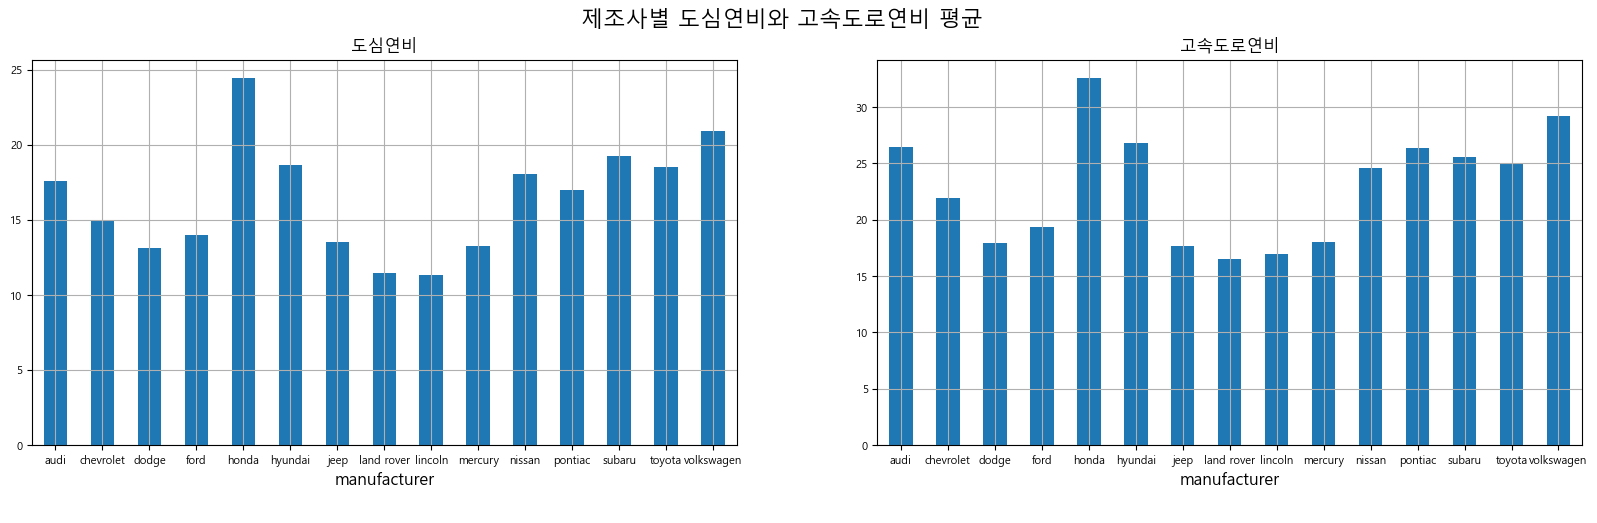

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# 전체 제목
fig.suptitle('제조사별 도심연비와 고속도로연비 평균', fontsize=16, color='#000000')

bth_mean['cty'].plot.bar(ax=ax1, rot=0, fontsize=8)
ax1.title.set_text("도심연비")
ax1.title.set_fontsize(12)
ax1.grid()

bth_mean['hwy'].plot.bar(ax=ax2, rot=0, fontsize=8)
ax2.title.set_text("고속도로연비")
ax2.title.set_fontsize(12)
plt.grid()

txt = """ """
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})

plt.show()
plt.close()

##  문제 6

배기량과 도심연비, 배기량과 고속도로 연비의 상관관계를 확인하고자 한다.

서브플롯에 각 그래프를 시각화 하고 추세선을 포함시키시오.



In [19]:
df6 = origin.filter(['model', 'displ', 'cty', 'hwy'])
df6

,model,displ,cty,hwy
id,,,,
1,a4,1.8,18,29
2,a4,1.8,21,29
3,a4,2.0,20,31
4,a4,2.0,21,30
5,a4,2.8,16,26
...,...,...,...,...
230,passat,2.0,19,28
231,passat,2.0,21,29
232,passat,2.8,16,26


> 배기량과 도심연비의 상관관계

In [20]:
x = df6['displ']
z = np.polyfit(x, df6['cty'], 1)
f = np.poly1d(z)
y = f(x)
y

array([21.25660024, 21.25660024, 20.73050389, 20.73050389, 18.6261185 ,
       18.6261185 , 17.83697398, 21.25660024, 21.25660024, 20.73050389,
       20.73050389, 18.6261185 , 18.6261185 , 17.83697398, 17.83697398,
       18.6261185 , 17.83697398, 14.94344407, 12.04991416, 12.04991416,
       12.04991416, 10.99772146, 10.20857694, 10.99772146, 10.99772146,
        9.6824806 ,  9.6824806 ,  7.57809521, 12.04991416, 12.04991416,
       10.99772146,  8.89333608, 19.67831119, 19.67831119, 17.83697398,
       16.78478128, 16.52173311, 19.67831119, 18.10002215, 17.31087763,
       17.31087763, 17.31087763, 17.31087763, 17.31087763, 15.99563676,
       15.99563676, 15.99563676, 15.46954042, 16.25868494, 16.25868494,
       15.73258859, 15.73258859, 13.6282032 , 13.6282032 , 13.6282032 ,
       12.31296233, 12.31296233, 15.73258859, 13.6282032 , 13.6282032 ,
       13.6282032 , 12.31296233, 10.99772146, 10.47162512, 13.6282032 ,
       13.6282032 , 13.6282032 , 13.6282032 , 13.6282032 , 13.62

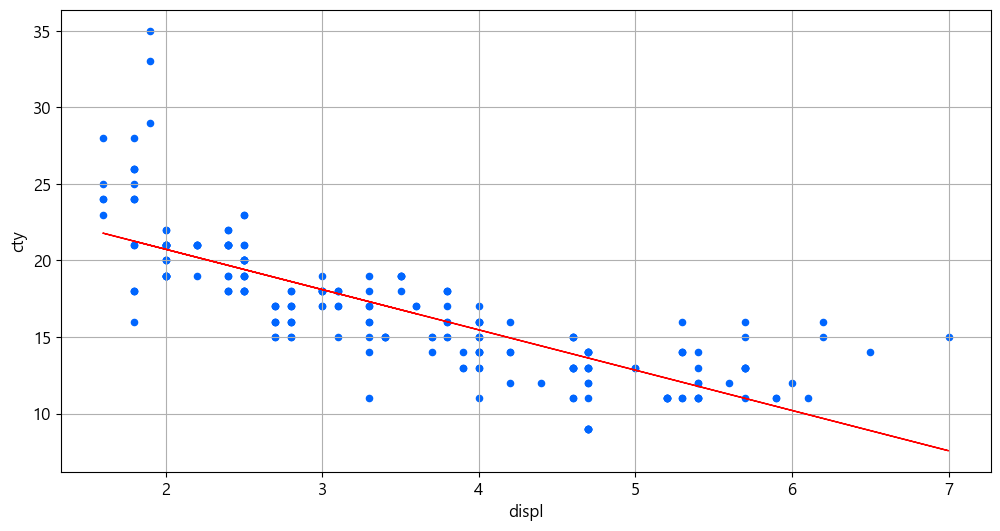

In [21]:
df6.plot.scatter(x='displ', y='cty', color="#0066ff")
plt.plot(x, y, color="#ff0000", linewidth=1)

plt.grid()

plt.show()

plt.close()

> 배기량과 고속도로연비

In [22]:
x = df6['displ']
z = np.polyfit(x, df6['hwy'], 1)
f = np.poly1d(z)
y = f(x)
y

array([29.3425912 , 29.3425912 , 28.63647344, 28.63647344, 25.81200239,
       25.81200239, 24.75282575, 29.3425912 , 29.3425912 , 28.63647344,
       28.63647344, 25.81200239, 25.81200239, 24.75282575, 24.75282575,
       25.81200239, 24.75282575, 20.86917807, 16.98553038, 16.98553038,
       16.98553038, 15.57329486, 14.51411821, 15.57329486, 15.57329486,
       13.80800045, 13.80800045, 10.98352941, 16.98553038, 16.98553038,
       15.57329486, 12.74882381, 27.22423792, 27.22423792, 24.75282575,
       23.34059023, 22.98753135, 27.22423792, 25.10588463, 24.04670799,
       24.04670799, 24.04670799, 24.04670799, 24.04670799, 22.28141359,
       22.28141359, 22.28141359, 21.57529583, 22.63447247, 22.63447247,
       21.92835471, 21.92835471, 19.10388366, 19.10388366, 19.10388366,
       17.33858926, 17.33858926, 21.92835471, 19.10388366, 19.10388366,
       19.10388366, 17.33858926, 15.57329486, 14.8671771 , 19.10388366,
       19.10388366, 19.10388366, 19.10388366, 19.10388366, 19.10

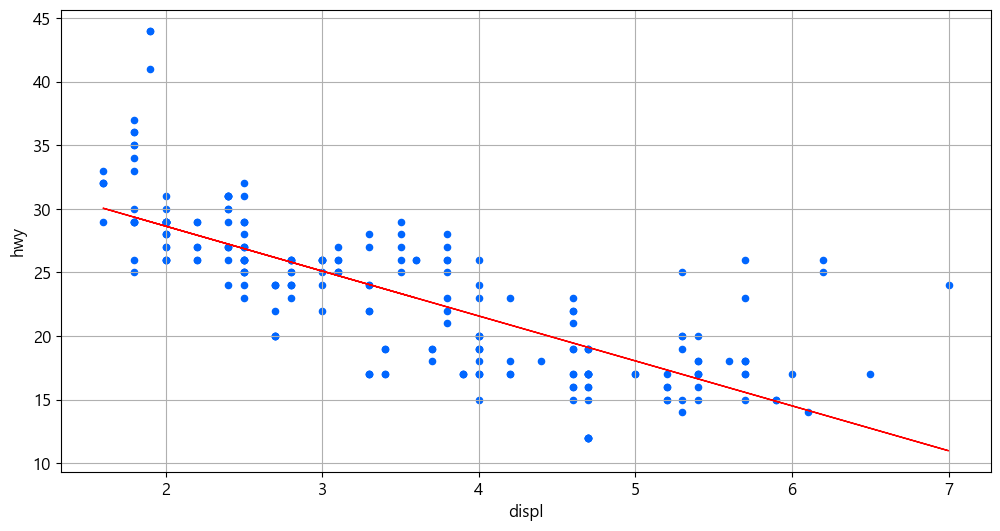

In [23]:
df6.plot.scatter(x='displ', y='hwy', color="#0066ff")
plt.plot(x, y, color="#ff0000", linewidth=1)

plt.grid()

plt.show()

plt.close()

##  문제 7

철수는 새로 자동차를 구입하고자 한다.

철수가 고려하는 가장 중요한 조건은 연비이다.

철수는 자동차의 평균연비를 고속도로 연비와 도심연비에 대한 평균으로 계산하기로 하고 이를 확인하기 위해 전체 자동차에 대한 평균연비를 구한 후 이 값보다 높은 연비를 갖는 자동차의 경우 `Pass`를, 그렇지 않을 경우 `Fail`로 구분하기로 했다.

1. `Pass` 등급과 `Fail` 등급의 비율을 시각화 하라.
2. `Pass` 등급과 `Fail` 등급이 각각 몇 대씩 있는지 실제 수량을 시각화 하라.
3. `Pass` 등급을 받은 자동차들에 대해 연비가 높은 순으로 각각의 연비를 시각화 하라

위의 세가지 조건을 만족하는 1행 3열의 서브플롯을 생성하시오.

In [98]:
df6
df6['mean'] = (df6['cty'] +df6['hwy'])/2
df6['mean'].max()

39.5

In [100]:
mean = df6['mean'].mean()
df6['grade'] = df6['mean'].apply(lambda x: 'pass' if x > mean else 'fail')

df6.loc[df6['mean']==39.5]

,model,displ,cty,hwy,mean,grade
id,,,,,,
222,new beetle,1.9,35,44,39.5,pass


In [101]:
df7 = df6.filter(['model','mean','grade'])
df7

,model,mean,grade
id,,,
1,a4,23.5,pass
2,a4,25.0,pass
3,a4,25.5,pass
4,a4,25.5,pass
5,a4,21.0,pass
...,...,...,...
230,passat,23.5,pass
231,passat,25.0,pass
232,passat,21.0,pass


In [27]:
df7['grade'].count()

234

In [70]:
df7_crs = crosstab(index=df7['model'], columns=df7['grade'],
         rownames=['model'], colnames=['grade'], margins=False, normalize=True)
# df7_crs['fail']
# df7_crs['pass'].value_counts()
total_ratio = df7_crs.sum()
total_ratio

grade
fail    0.474359
pass    0.525641
dtype: float64

In [29]:
df7_crs = crosstab(index=df7['model'], columns=df7['grade'],
         rownames=['model'], colnames=['grade'], margins=False)
total = df7_crs.sum()
total



grade
fail    111
pass    123
dtype: int64

In [104]:
# df7.sort_values('mean', ascending=False)
pass_only=df7[df7['grade']=='pass']
pass_only.set_index('model')

pass_only = pass_only.sort_values('mean', ascending=False)
head = pass_only.head(10)
head


,model,mean,grade
id,,,
222,new beetle,39.5,pass
213,jetta,38.5,pass
223,new beetle,35.0,pass
197,corolla,32.5,pass
196,corolla,30.5,pass
198,corolla,30.5,pass
106,civic,30.5,pass
100,civic,30.5,pass
107,civic,30.0,pass


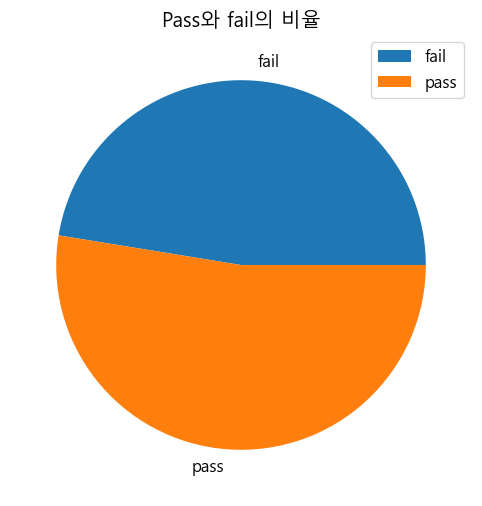

In [32]:
df7_crs.sum().plot.pie(rot=0)
plt.grid()
plt.legend()
plt.title("Pass와 fail의 비율")
plt.show()
plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


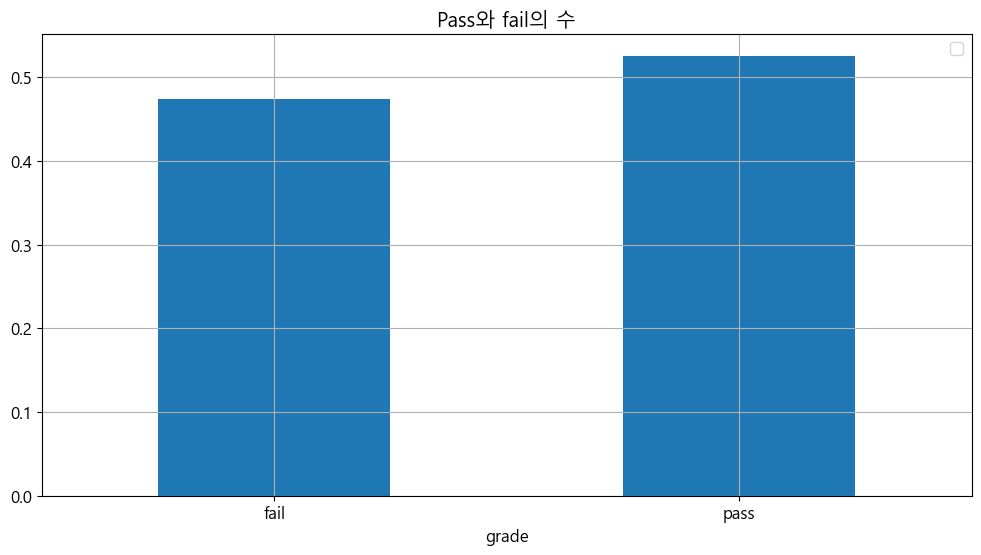

In [33]:
total_ratio.plot.bar(rot=0)
plt.grid()
plt.legend()
plt.title("Pass와 fail의 수")
plt.show()
plt.close()

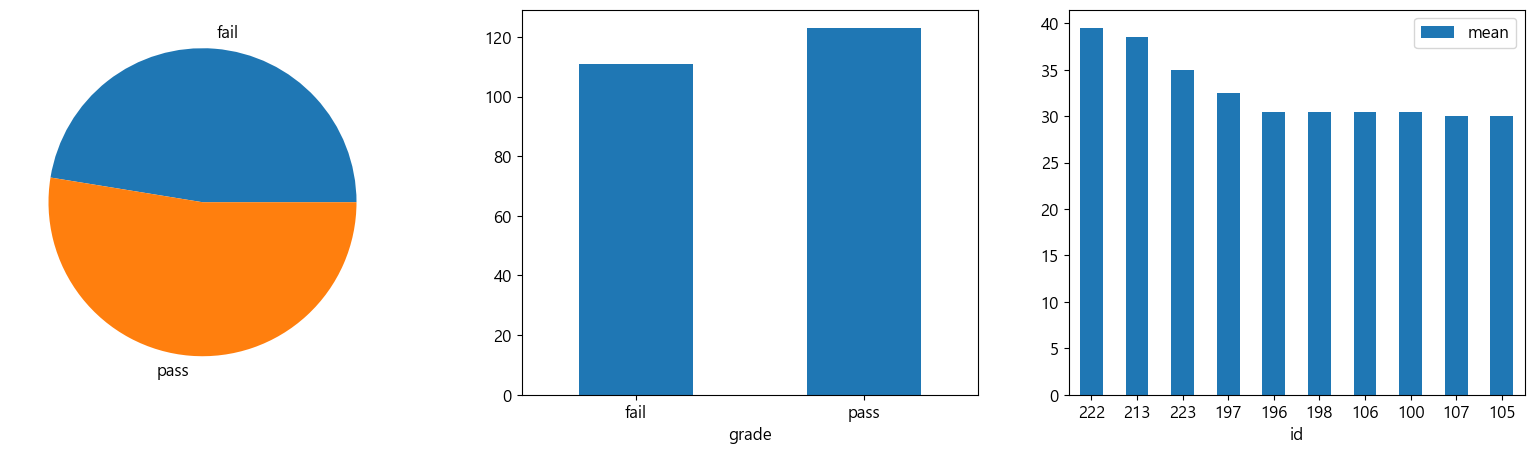

In [116]:
# 서브플롯 생성
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# 데이터프레임을 기반으로 각 영역에 그래프를 종류별로 표시
total.plot.pie(ax=ax[0], rot=0)
total.plot.bar(ax=ax[1], rot= 0)                    # 막대
head.plot.bar(ax=ax[2], rot=0)          # 막대

# df7['mean'].hist(bins=5, linewidth=0.5, edgecolor="#000000", ax=ax[2])           
# 그래프 출력하기
plt.show()
plt.close()

In [2]:
# --------------------------------------------------------------
# 1행 3열의 영역을 생성한다
# --------------------------------------------------------------
fig, (ax1, ax2, ax3 ) = plt.subplots(1, 3, figsize=(20, 8))

# 전체 제목
fig.suptitle('자동차 연비 비교', fontsize=10, color='#000000')

# 각 그래프 간의 가로(wspace),세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.3)
# --------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 파이 그래프
# --------------------------------------------------------------
# 파이그래프
total.plot.pie(ax=ax1, labels=['fail', 'pass'], autopct="%0.1f%%",
                    textprops={'color': "#000000", 'fontsize': 10})

# 그래프 제목
ax1.title.set_text("Pass와 fail의 비율")
ax1.title.set_fontsize(10)
ax1.title.set_color('#000000')

# 격자표시 --> 파이그래프인 경우는 표시 안됨
ax1.grid()

# y축 라벨이 불필요하므로 제거
ax1.set(ylabel=None)

# 범주 표시
# ax1.legend(labels=['pass', 'fail'], title='범주', bbox_to_anchor=(-0.05, 1.1))

# --------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 막대 그래프
# --------------------------------------------------------------
# 막대 그래프 표시
# -> x축의 텍스트가 90도로 표시되므로 rot 파라미터를 사용하여 0도로 재지정
# -> 데이터프레임의 각 컬럼에 대한 색상 지정
total.plot.bar(ax=ax2, rot=0, color=['#4F6F52', '#739072', '#86A789'])

# 배경 격자 표시
ax2.grid()

# 그래프 제목의 텍스트, 글자크기, 색상
ax2.title.set_text("Pass와 fail의 수")
ax2.title.set_fontsize(10)
ax2.title.set_color('#000000')

# x축의 좌표만 지정함 (막대그래프의 경우 x축 좌표는 무조건 0부터 시작함)
ax2.set_xticks(list(range(0, 2)))

# 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
ax2.set_xticklabels(['fail', 'pass'], fontsize=10, color='#000000')

# x축과 y축의 라벨을 지정 (불필요한 부분은 생략 가능)
ax2.set(xlabel='등급', ylabel='수')

# --------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 막대 그래프
# --------------------------------------------------------------
# 막대 그래프 표시
# -> x축의 텍스트가 90도로 표시되므로 rot 파라미터를 사용하여 0도로 재지정
# -> 데이터프레임의 각 컬럼에 대한 색상 지정
head.plot.bar(ax=ax3, rot=0, color=['#4F6F52', '#739072', '#86A789'])

# 배경 격자 표시
ax3.grid()

# 그래프 제목의 텍스트, 글자크기, 색상
ax3.title.set_text("연비순으로 정렬한 자동차 종류")
ax3.title.set_fontsize(10)
ax3.title.set_color('#000000')

# x축의 좌표만 지정함 (막대그래프의 경우 x축 좌표는 무조건 0부터 시작함)
ax3.set_xticks(list(range(0, len(head.index))))

# 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
ax3.set_xticklabels(head['model'], fontsize=9, color='#000000')

# x축과 y축의 라벨을 지정 (불필요한 부분은 생략 가능)
ax3.set(xlabel='model', ylabel='mean')



# --------------------------------------------------------------
# 그래프 출력하기
# --------------------------------------------------------------
plt.show()
plt.close()

NameError: name 'plt' is not defined